In [1]:
from core.preprocessing import make_small_train, make_small_dev
from core.problems import FunctionalRegression
from core.utilities import plot_forecasts, calc_test_mse
import numpy as np
import pandas as pd
df = pd.read_pickle('data/detrended_master_dataset.pkl').fillna(0)
clearsky_df = pd.read_pickle('data/clearsky_master_dataset.pkl').fillna(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train_df = make_small_train(df, 'combined')
test_df = make_small_dev(df)
test_clearsky = make_small_dev(clearsky_df)

In [3]:
funcreg = FunctionalRegression(train_df, test_df)

In [4]:
ns = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100]
param_search = pd.DataFrame(index=ns, columns=['mse'])
for n in ns:
    funcreg.make_forecasts(neighborhood=n)
    param_search.loc[n] = funcreg.calc_mse()

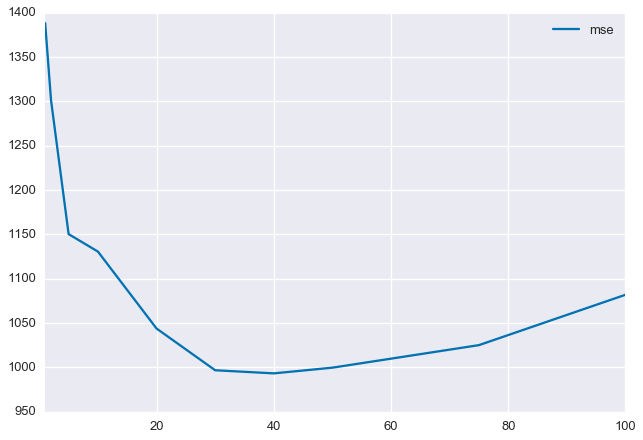

In [5]:
param_search.plot()

In [6]:
funcreg.make_forecasts(neighborhood=40)
funcreg.calc_mse()

993.23538804389398

(24815518.75, 24821276.25)

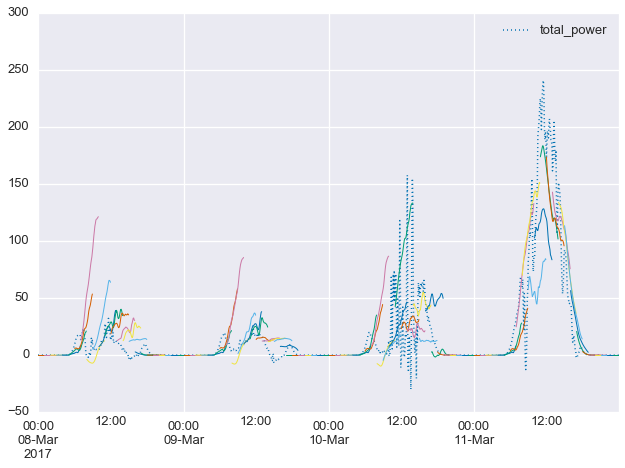

In [7]:
Transform back to Power from devation from clear sky.funcreg.plot_test()
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_xlim(start, end)

Transform back to Power from devation from clear sky.

In [9]:
forecasts = funcreg.forecasts

In [10]:
transformed_forecasts = [(clearsky_df['total_power'] - f).dropna() for f in forecasts]

(24815518.75, 24821276.25)

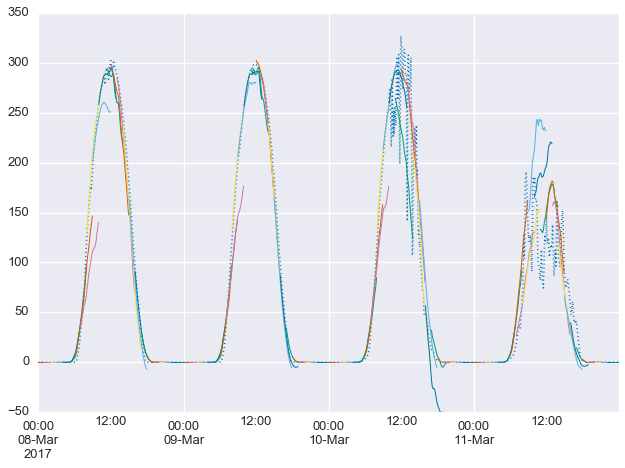

In [11]:
plot_forecasts((clearsky_df['total_power'] - test_df['total_power']).dropna(), transformed_forecasts)
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 2*chunk
end = lim[0] + 6*chunk
ax.set_ylim(-50, 350)
ax.set_xlim(start, end)

In [12]:
calc_test_mse((clearsky_df['total_power'] - test_df['total_power']).dropna(), transformed_forecasts)

1189.4933040832757